# Hoouse Price Prediction Project

### this project will be about using Tree based ML algorithm to predict the housing price based on different features

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [184]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [141]:
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


# 

### check data type and stats of data

In [222]:
train.describe()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley_Grvl,Alley_Pave,BedroomAbvGr,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,...,ScreenPorch,Street_Pave,TotRmsAbvGrd,TotalBsmtSF,Utilities_AllPub,Utilities_NoSeWa,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.0,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,1162.626712,346.992466,3.409589,0.034247,0.028082,2.866438,0.021233,0.035616,0.029452,0.078082,...,15.060959,0.995890,6.517808,1057.429452,0.0,0.000685,94.244521,1971.267808,1984.865753,2007.815753
std,386.587738,436.528436,29.317331,0.181924,0.165264,0.815778,0.144209,0.185395,0.169128,0.268393,...,55.757415,0.063996,1.625393,438.705324,0.0,0.026171,125.338794,30.202904,20.645407,1.328095
min,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,2.000000,0.000000,0.0,0.000000,0.000000,1872.000000,1950.000000,2006.000000
25%,882.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,5.000000,795.750000,0.0,0.000000,0.000000,1954.000000,1967.000000,2007.000000
50%,1087.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,6.000000,991.500000,0.0,0.000000,0.000000,1973.000000,1994.000000,2008.000000
75%,1391.250000,728.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,7.000000,1298.250000,0.0,0.000000,168.000000,2000.000000,2004.000000,2009.000000
max,4692.000000,2065.000000,508.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,1.000000,...,480.000000,1.000000,14.000000,6110.000000,0.0,1.000000,857.000000,2010.000000,2010.000000,2010.000000


In [185]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# 

### check the shape of train and test data

In [187]:
print("train shape:",train.shape,"\n","test shape:",test.shape)

train shape: (1460, 81) 
 test shape: (1459, 80)


### So let's fill in the null value as 0, this determine that the value of that feature in a house is not available and this helps to determine the price of house from all variables given. Also I will drop the Id variables, which does not have any contribution to the goal of the project

In [188]:
train = train.fillna(0)
test = test.fillna(0)

train = train.drop('Id', axis =1) 
test = test.drop('Id', axis =1) 

# 

### In the first visualization, it reflects the sales distribution and determine the handling method for target value

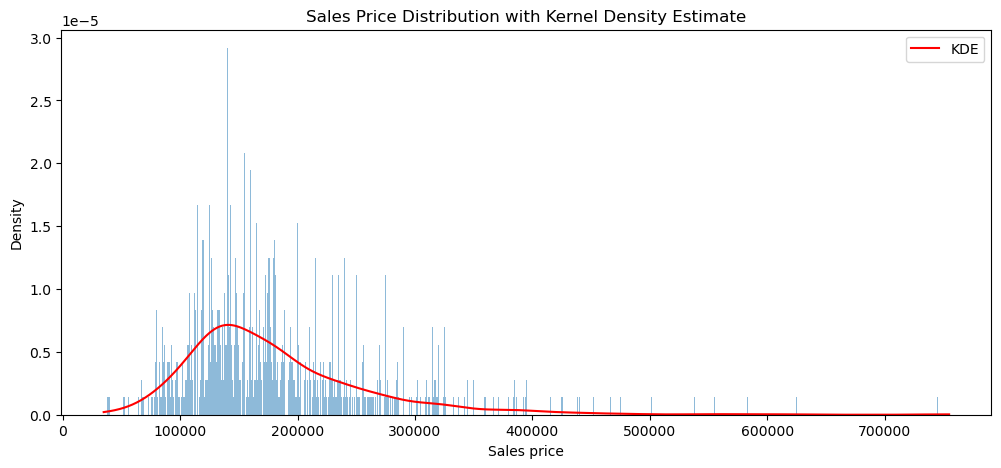

In [190]:
from scipy.stats import gaussian_kde

sale_prices = train['SalePrice']

plt.figure(figsize=(12,5))
plt.hist(sale_prices, bins=len(train), alpha=0.5, density=True)

kde = gaussian_kde(sale_prices)
x = np.linspace(min(sale_prices), max(sale_prices), 1000)
plt.plot(x, kde(x), color='red', label='KDE')

plt.xlabel('Sales price')
plt.ylabel('Density')
plt.title('Sales Price Distribution with Kernel Density Estimate')
plt.legend()

plt.show()

# 

### After the first visualization, let's see how the initial numerical data correlate to each others

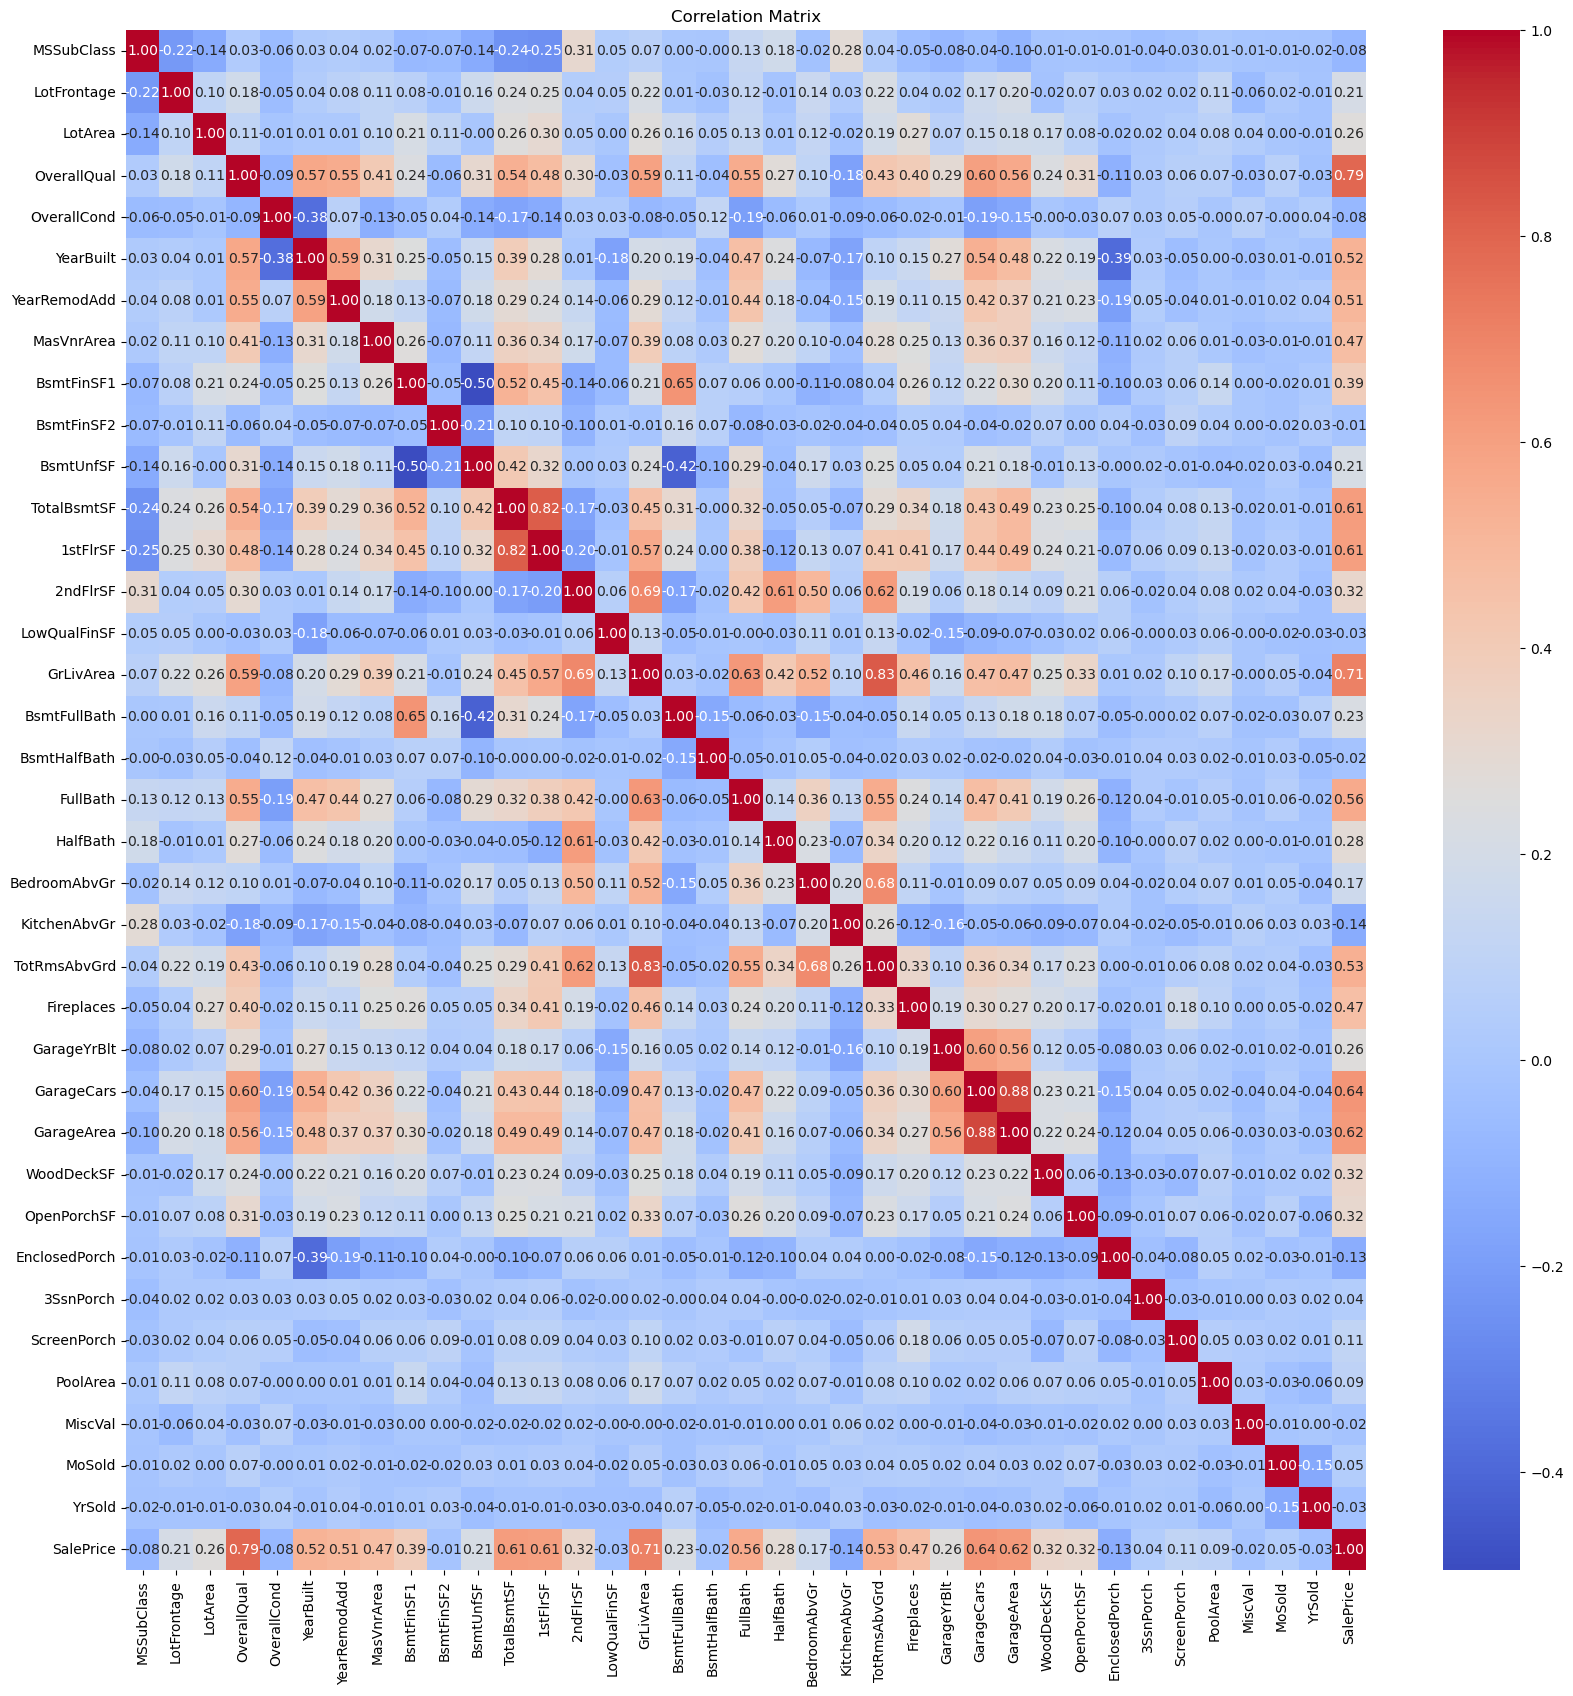

In [192]:
numeric_columns = train.select_dtypes(include=['int64', 'float64'])

correlation_matrix = numeric_columns.corr()

plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# 

### Next step is feature engineering, what I want to accomplish to to have it the same on both train and test data so it can reflect as a wider method for both dataset. Therefore, after the feature engineering, I will match the number of varibles of train and test data 

In [193]:
object_columns_train = train.select_dtypes(include=['object'])
object_columns_test = test.select_dtypes(include=['object'])

unique_categories_train = set()
unique_categories_test = set()

for col in object_columns_train:
    unique_categories_train.update(train[col].unique())

for col in object_columns_test:
    unique_categories_test.update(test[col].unique())

all_unique_categories = unique_categories_train.union(unique_categories_test)

train = pd.get_dummies(train, columns=object_columns_train.columns, drop_first=True)
test = pd.get_dummies(test, columns=object_columns_test.columns, drop_first=True)

train, test = train.align(test, join='outer', axis=1, fill_value=0)

### This following step is to double checking and print the shape of both datas

In [194]:
train_columns = set(train.columns)
test_columns = set(test.columns)

if train_columns == test_columns:
    print("Train and test data have the same columns.")
    print('train shape:',train.shape, "\n", 'test shape:',test.shape)
else:
    print("Train and test data have different columns.")
    

Train and test data have the same columns.
train shape: (1460, 269) 
 test shape: (1459, 269)


# 

## ML modeling

### In this project, I will applied three main model of Random Forest Regressor, XGBoost and XGBoost Random Forest method to determine the best fit and compare model 

In [195]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor, XGBRFRegressor
from sklearn.metrics import r2_score, mean_squared_error

In [196]:
x = train.drop('SalePrice', axis =1)
y = train['SalePrice']

In [197]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42)

In [198]:
rfr = RandomForestRegressor().fit(x_train, y_train)
xgb = XGBRegressor().fit(x_train, y_train)
xgbrf = XGBRFRegressor().fit(x_train, y_train)

In [199]:
y_pred_rfr = rfr.predict(x_test)
y_pred_xgb = xgb.predict(x_test)
y_pred_xgbrf = xgbrf.predict(x_test)

## Let's print out result and compare

In [200]:
r2_rfr = r2_score(y_test, y_pred_rfr)
r2_xgb = r2_score(y_test, y_pred_xgb)
r2_xgbrf = r2_score(y_test, y_pred_xgbrf)

mse_rfr = mean_squared_error(y_test, y_pred_rfr)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
mse_xgbrf = mean_squared_error(y_test, y_pred_xgbrf)

result1 = pd.DataFrame({
    'Model': ['Random Forest Regressor', 'XGBoost', 'XGBoost with Random Forest'],
    'R2 Score': [r2_rfr, r2_xgb, r2_xgbrf],
    'Mean Squared Error': [mse_rfr, mse_xgb, mse_xgbrf]
})
result1

,Model,R2 Score,Mean Squared Error
0,Random Forest Regressor,0.897200,7.173478e+08
1,XGBoost,0.902683,6.790884e+08
2,XGBoost with Random Forest,0.874179,8.779876e+08


### In the result, the XGBoost model sees to have the best performance at 90% r2 and lowest MSE at 6.790884e+08. However, at high accuracy rate there is a possibility of overfitting and cannot apply to many dataset, therefore an additonal step using K-fold cross validation is needed

In [201]:
rfr_cv = cross_val_score(RandomForestRegressor(), x, y, cv=5).round(2)
xgb_cv = cross_val_score(XGBRegressor(), x, y, cv=5).round(2)
xgbrf_cv = cross_val_score(XGBRFRegressor(), x, y, cv=5).round(2)

CV_table1 = pd.DataFrame({
    'Model': ['Random Forest Regressor', 'XGBoost', 'XGBoost with Random Forest'],
    'Cross Val Score': [rfr_cv, xgb_cv, xgbrf_cv],
    'Average CV score': [np.mean(rfr_cv), np.mean(xgb_cv), np.mean(xgbrf_cv)],
    'Stdev CV score': [np.std(rfr_cv), np.std(xgb_cv), np.std(xgbrf_cv)]
})
CV_table1

,Model,Cross Val Score,Average CV score,Stdev CV score
0,Random Forest Regressor,"[0.87, 0.84, 0.87, 0.88, 0.82]",0.856,0.022450
1,XGBoost,"[0.87, 0.79, 0.88, 0.89, 0.88]",0.862,0.036551
2,XGBoost with Random Forest,"[0.85, 0.8, 0.86, 0.85, 0.81]",0.834,0.024166


### From the cross val score, the model does not seems to have a bad performance however, the difference between inital result and average K fold result tells that this model can be tuned. The process will be performed by following steps

# 

### For the tuning method I will applied is to reduce the dimensionality of data and in this case, the best method is by select right feature by apply the bidirectional method (backward and forward), this helps to optimize and have a full consideration across all variables

In [202]:
import statsmodels.api as sm


In [203]:
def bidirectional_feature_selection(x, y, significance_threshold=0.05):
    selected_features = set(x.columns)
    
    while True:
        model = sm.OLS(y, sm.add_constant(x[selected_features])).fit()
        p_values = model.pvalues.iloc[1:]
        significant_features = p_values[p_values < significance_threshold].index

        if len(significant_features) == len(selected_features):
            break
        model = sm.OLS(y, sm.add_constant(x[significant_features])).fit()
        non_significant_features = p_values[p_values >= significance_threshold].index
        for feature in non_significant_features:
            selected_features.remove(feature)

    return selected_features

In [204]:
bidirectional_feature_selection(x,y)

/var/folders/_v/f8t16ncj18bdzf3ss6_9n9400000gn/T/ipykernel_74430/2736431477.py:5: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  model = sm.OLS(y, sm.add_constant(x[selected_features])).fit()
/var/folders/_v/f8t16ncj18bdzf3ss6_9n9400000gn/T/ipykernel_74430/2736431477.py:5: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  model = sm.OLS(y, sm.add_constant(x[selected_features])).fit()
/var/folders/_v/f8t16ncj18bdzf3ss6_9n9400000gn/T/ipykernel_74430/2736431477.py:5: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  model = sm.OLS(y, sm.add_constant(x[selected_features])).fit()
/var/folders/_v/f8t16ncj18bdzf3ss6_9n9400000gn/T/ipykernel_74430/2736431477.py:5: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  model = sm.OLS(y, sm.ad

{'1stFlrSF',
 '2ndFlrSF',
 'BedroomAbvGr',
 'BsmtFinSF1',
 'Condition1_Norm',
 'Condition2_PosN',
 'Condition2_RRAe',
 'ExterQual_Gd',
 'ExterQual_TA',
 'Exterior1st_AsbShng',
 'Fence_GdPrv',
 'Fireplaces',
 'Functional_Typ',
 'GarageArea',
 'GarageCond_Ex',
 'GarageQual_Ex',
 'GrLivArea',
 'KitchenAbvGr',
 'KitchenQual_Ex',
 'KitchenQual_Fa',
 'KitchenQual_Gd',
 'KitchenQual_TA',
 'LandSlope_Sev',
 'LotArea',
 'LotConfig_CulDSac',
 'LowQualFinSF',
 'MSZoning_C (all)',
 'MSZoning_FV',
 'MSZoning_RL',
 'MasVnrArea',
 'Neighborhood_Edwards',
 'Neighborhood_Mitchel',
 'Neighborhood_NAmes',
 'Neighborhood_NWAmes',
 'Neighborhood_NoRidge',
 'Neighborhood_NridgHt',
 'Neighborhood_StoneBr',
 'OverallCond',
 'OverallQual',
 'PoolArea',
 'PoolQC_Fa',
 'PoolQC_Gd',
 'RoofMatl_CompShg',
 'RoofMatl_Membran',
 'RoofMatl_Metal',
 'RoofMatl_Roll',
 'RoofMatl_Tar&Grv',
 'RoofMatl_WdShake',
 'RoofMatl_WdShngl',
 'RoofStyle_Shed',
 'SaleCondition_Normal',
 'SaleType_COD',
 'ScreenPorch',
 'Street_Pave',

# 

### After that, the selected feature will be used in applying to create new x, also I will normalize the Sales prize by using logarithmic algorithm to achieve normal distribution for better prediction

In [205]:
x2 = train[['1stFlrSF',
 '2ndFlrSF',
 'BedroomAbvGr',
 'BsmtFinSF1',
 'Condition1_Norm',
 'Condition2_PosN',
 'Condition2_RRAe',
 'ExterQual_Gd',
 'ExterQual_TA',
 'Exterior1st_AsbShng',
 'Fence_GdPrv',
 'Fireplaces',
 'Functional_Typ',
 'GarageArea',
 'GarageCond_Ex',
 'GarageQual_Ex',
 'GrLivArea',
 'KitchenAbvGr',
 'KitchenQual_Ex',
 'KitchenQual_Fa',
 'KitchenQual_Gd',
 'KitchenQual_TA',
 'LandSlope_Sev',
 'LotArea',
 'LotConfig_CulDSac',
 'LowQualFinSF',
 'MSZoning_C (all)',
 'MSZoning_FV',
 'MSZoning_RL',
 'MasVnrArea',
 'Neighborhood_Edwards',
 'Neighborhood_Mitchel',
 'Neighborhood_NAmes',
 'Neighborhood_NWAmes',
 'Neighborhood_NoRidge',
 'Neighborhood_NridgHt',
 'Neighborhood_StoneBr',
 'OverallCond',
 'OverallQual',
 'PoolArea',
 'PoolQC_Fa',
 'PoolQC_Gd',
 'RoofMatl_CompShg',
 'RoofMatl_Membran',
 'RoofMatl_Metal',
 'RoofMatl_Roll',
 'RoofMatl_Tar&Grv',
 'RoofMatl_WdShake',
 'RoofMatl_WdShngl',
 'RoofStyle_Shed',
 'SaleCondition_Normal',
 'SaleType_COD',
 'ScreenPorch',
 'Street_Pave',
 'TotalBsmtSF',
 'YearBuilt']]
y2 = np.log(train['SalePrice'])

In [206]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(x2,y2, test_size=0.3, random_state=42)

In [207]:
rfr2 = RandomForestRegressor().fit(x_train2, y_train2)
xgb2 = XGBRegressor().fit(x_train2, y_train2)
xgbrf2 = XGBRFRegressor().fit(x_train2, y_train2)

In [208]:
y_pred_rfr2 = rfr2.predict(x_test2)
y_pred_xgb2 = xgb2.predict(x_test2)
y_pred_xgbrf2 = xgbrf2.predict(x_test2)

# 

### Second result after tuning

In [209]:
r2_rfr2 = r2_score(y_test2, y_pred_rfr2)
r2_xgb2 = r2_score(y_test2, y_pred_xgb2)
r2_xgbrf2 = r2_score(y_test2, y_pred_xgbrf2)

mse_rfr2 = mean_squared_error(y_test2, y_pred_rfr2)
mse_xgb2 = mean_squared_error(y_test2, y_pred_xgb2)
mse_xgbrf2 = mean_squared_error(y_test2, y_pred_xgbrf2)

result1 = pd.DataFrame({
    'Model': ['Random Forest Regressor', 'XGBoost', 'XGBoost with Random Forest'],
    'R2 Score': [r2_rfr2, r2_xgb2, r2_xgbrf2],
    'Mean Squared Error': [mse_rfr2, mse_xgb2, mse_xgbrf2]
})
result1

,Model,R2 Score,Mean Squared Error
0,Random Forest Regressor,0.887257,0.019126
1,XGBoost,0.886146,0.019315
2,XGBoost with Random Forest,0.864775,0.022940


# 

### After tuning, the random forest regressor and xgboost tends to have similar initial result. How about K-fold cross validation it once more?

In [210]:
rfr_cv2 = cross_val_score(RandomForestRegressor(), x2, y2, cv=5).round(2)
xgb_cv2 = cross_val_score(XGBRegressor(), x2, y2, cv=5).round(2)
xgbrf_cv2 = cross_val_score(XGBRFRegressor(), x2, y2, cv=5).round(2)

CV_table2 = pd.DataFrame({
    'Model': ['Random Forest Regressor', 'XGBoost', 'XGBoost with Random Forest'],
    'Cross Val Score': [rfr_cv2, xgb_cv2, xgbrf_cv2],
    'Average CV score': [np.mean(rfr_cv2), np.mean(xgb_cv2), np.mean(xgbrf_cv2)],
    'Stdev CV score': [np.std(rfr_cv2), np.std(xgb_cv2), np.std(xgbrf_cv2)]
})
CV_table2

,Model,Cross Val Score,Average CV score,Stdev CV score
0,Random Forest Regressor,"[0.87, 0.87, 0.87, 0.89, 0.86]",0.872,0.009798
1,XGBoost,"[0.89, 0.87, 0.86, 0.87, 0.88]",0.874,0.010198
2,XGBoost with Random Forest,"[0.84, 0.84, 0.85, 0.86, 0.85]",0.848,0.007483


### As the result shown, there is no significant difference in choosing either Random Forest Regressor or XGBoost algorithm for the modeling because there is minimal accuracy difference of less than 0.5% average and 0.001 in standard deviation of the cross validation. 

# 

# 

### This will lead to another testing method is how fast each algorithm perform in this housing dataset 

In [224]:
import time

In [233]:
start_time_rfr_fit = time.time()
rfr2 = RandomForestRegressor().fit(x_train2, y_train2)
end_time_rfr_fit = time.time()
runtime_rfr_fit = end_time_rfr_fit - start_time_rfr_fit

start_time_rfr_pred = time.time()
y_pred_rfr2 = rfr2.predict(x_test2) 
end_time_rfr_pred = time.time()
runtime_rfr_pred = end_time_rfr_pred - start_time_rfr_pred

start_time_xgb_fit = time.time()
xgb2 = XGBRegressor().fit(x_train2, y_train2)
end_time_xgb_fit = time.time()
runtime_xgb_fit = end_time_xgb_fit - start_time_xgb_fit

start_time_xgb_pred = time.time()
y_pred_xgb2 = xgb2.predict(x_test2)
end_time_xgb_pred = time.time()
runtime_xgb_pred = end_time_xgb_pred - start_time_xgb_pred

print("Runtime comparison:")
print("Random Forest - Fit Time:", runtime_rfr_fit)
print("Random Forest - Predict Time:", runtime_rfr_pred)
print("XGBoost - Fit Time:", runtime_xgb_fit)
print("XGBoost - Predict Time:", runtime_xgb_pred)

Runtime comparison:
Random Forest - Fit Time: 0.65301513671875
Random Forest - Predict Time: 0.007853984832763672
XGBoost - Fit Time: 0.304196834564209
XGBoost - Predict Time: 0.005221843719482422


## This time, the conclusion is made, the XGBoost tends to be a better model for the data, despite of the slightly lower accuracy, however the run time and efficiency is really important in coduncting analysis in fast pace. Therefore, this model will be used and applied to the test data

# 

# 

# Testing on test data

In [213]:
test2 = test[['1stFlrSF',
 '2ndFlrSF',
 'BedroomAbvGr',
 'BsmtFinSF1',
 'Condition1_Norm',
 'Condition2_PosN',
 'Condition2_RRAe',
 'ExterQual_Gd',
 'ExterQual_TA',
 'Exterior1st_AsbShng',
 'Fence_GdPrv',
 'Fireplaces',
 'Functional_Typ',
 'GarageArea',
 'GarageCond_Ex',
 'GarageQual_Ex',
 'GrLivArea',
 'KitchenAbvGr',
 'KitchenQual_Ex',
 'KitchenQual_Fa',
 'KitchenQual_Gd',
 'KitchenQual_TA',
 'LandSlope_Sev',
 'LotArea',
 'LotConfig_CulDSac',
 'LowQualFinSF',
 'MSZoning_C (all)',
 'MSZoning_FV',
 'MSZoning_RL',
 'MasVnrArea',
 'Neighborhood_Edwards',
 'Neighborhood_Mitchel',
 'Neighborhood_NAmes',
 'Neighborhood_NWAmes',
 'Neighborhood_NoRidge',
 'Neighborhood_NridgHt',
 'Neighborhood_StoneBr',
 'OverallCond',
 'OverallQual',
 'PoolArea',
 'PoolQC_Fa',
 'PoolQC_Gd',
 'RoofMatl_CompShg',
 'RoofMatl_Membran',
 'RoofMatl_Metal',
 'RoofMatl_Roll',
 'RoofMatl_Tar&Grv',
 'RoofMatl_WdShake',
 'RoofMatl_WdShngl',
 'RoofStyle_Shed',
 'SaleCondition_Normal',
 'SaleType_COD',
 'ScreenPorch',
 'Street_Pave',
 'TotalBsmtSF',
 'YearBuilt']]


In [238]:
xgb_model = XGBRegressor()
xgb_model.fit(x2, y2)
y_test_pred = xgb_model.predict(test2)

In [269]:
result = pd.DataFrame(np.exp(y_test_pred))

In [270]:
result

,0
0,129134.406250
1,170790.828125
2,210647.875000
3,205740.359375
4,191850.484375
...,...
1454,83897.242188
1455,88641.125000
1456,166594.546875
1457,108402.351562


In [243]:
result.to_csv('predicted_prices.csv', index=False)

### The result is determine by e**y because the logarithmic is used, so when to print the actual result of sales price, I have to exponential to power of y to return to final result.

# 

# This concludes my Predictive Model for Housing price Prediction by using XGBoost regressor

# 

# 